In [22]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
import unidecode
from jiwer import wer, cer
from tqdm import tqdm
tqdm.pandas()

In [52]:
march12_eval_path='../../data/biling_eval/elan_outputs/HH20210312/checkpoints-eval.csv'
sep13_eval_path='../../data/biling_eval/elan_outputs/HH20210913/checkpoints-eval.csv'
asr_eval_path='../../data/biling_eval/elan_outputs/tira-clean-split-eval.csv'
biling_eval_path='../../data/whisper-large-runs.csv'

In [24]:
march_df=pd.read_csv(march12_eval_path)
march_df.head()

,eval_loss,eval_model_preparation_time,eval_wer,eval_cer,eval_cer_processed,eval_wer_processed,eval_runtime,eval_samples_per_second,eval_steps_per_second,checkpoint
0,NaN,NaN,1.607442,0.935779,NaN,NaN,NaN,NaN,NaN,0
1,1.123045,0.0135,0.925947,0.699217,0.708213,0.980365,512.2158,0.172,0.043,/home/AD/mjsimmons/models/whisper-large-tira-y...
2,1.165942,0.0136,0.824404,0.631477,0.641508,0.874895,301.2922,0.292,0.073,/home/AD/mjsimmons/models/whisper-large-tira-y...
3,1.240919,0.0135,0.856662,0.729084,0.734122,0.883310,175.8288,0.500,0.125,/home/AD/mjsimmons/models/whisper-large-tira-y...
4,1.327963,0.0126,0.893128,0.707988,0.708573,0.913043,205.3396,0.429,0.107,/home/AD/mjsimmons/models/whisper-large-tira-y...


In [25]:
sep_df=pd.read_csv(sep13_eval_path)
sep_df.head()

,eval_loss,eval_model_preparation_time,eval_wer,eval_cer,eval_cer_processed,eval_wer_processed,eval_runtime,eval_samples_per_second,eval_steps_per_second,checkpoint
0,NaN,NaN,0.522392,0.377644,NaN,NaN,NaN,NaN,NaN,0
1,2.188538,0.0122,0.940191,0.685486,0.683642,0.995955,593.6223,0.109,0.029,/home/AD/mjsimmons/models/whisper-large-tira-y...
2,2.287274,0.0131,0.911586,0.692971,0.702679,0.976596,322.7450,0.201,0.053,/home/AD/mjsimmons/models/whisper-large-tira-y...
3,2.443920,0.0131,0.904363,0.757349,0.755613,0.965039,270.4858,0.240,0.063,/home/AD/mjsimmons/models/whisper-large-tira-y...
4,2.578733,0.0135,0.947992,0.805185,0.805456,0.976885,192.5449,0.338,0.088,/home/AD/mjsimmons/models/whisper-large-tira-y...


In [26]:
asr_df=pd.read_csv(asr_eval_path)
asr_df.head()

,checkpoint,epoch,cer,wer
0,whisper-large-v3,0,0.775819,0.879102
1,checkpoint-2048,1,0.148555,0.589172
2,checkpoint-4096,2,0.128928,0.557492
3,checkpoint-6144,3,0.130384,0.555816
4,checkpoint-8192,4,0.124728,0.521623


In [63]:
long_df=pd.read_csv(biling_eval_path)
long_df=long_df[long_df['experiment_name']=='whisper-large-v3-LoRA-longlabels']
long_df['epoch']=long_df['step']//2048
long_df.head()

,step,tag,value,experiment_name,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,epoch
7,0,eval/HH20210312_cer,0.571878,whisper-large-v3-LoRA-longlabels,NaN,True,-1,False,NaN,NaN,0
8,2048,eval/HH20210312_cer,0.556360,whisper-large-v3-LoRA-longlabels,NaN,True,-1,False,NaN,NaN,1
9,4096,eval/HH20210312_cer,0.735876,whisper-large-v3-LoRA-longlabels,NaN,True,-1,False,NaN,NaN,2
10,6144,eval/HH20210312_cer,0.771590,whisper-large-v3-LoRA-longlabels,NaN,True,-1,False,NaN,NaN,3
11,8192,eval/HH20210312_cer,0.452906,whisper-large-v3-LoRA-longlabels,NaN,True,-1,False,NaN,NaN,4


In [65]:
longlabels_ds='tira-longlabels'
asr_ds='tira-clean-split'
march_ds='HH20210312'
sep_ds='HH20210913'

long_asr_cer = long_df[long_df['tag']==f'eval/{asr_ds}_cer'].copy()
long_asr_wer = long_df[long_df['tag']==f'eval/{asr_ds}_wer'].copy()
long_asr_cer['cer']=long_asr_cer['value']
long_asr_wer['wer']=long_asr_wer['value']
long_asr = long_asr_cer[['epoch','cer']].merge(long_asr_wer[['epoch','wer']], on='epoch')

long_march_cer = long_df[long_df['tag']==f'eval/{march_ds}_cer'].copy()
long_march_wer = long_df[long_df['tag']==f'eval/{march_ds}_wer'].copy()
long_march_cer['cer']=long_march_cer['value']
long_march_wer['wer']=long_march_wer['value']
long_march = long_march_cer[['epoch','cer']].merge(long_march_wer[['epoch','wer']], on='epoch')

long_sep_cer = long_df[long_df['tag']==f'eval/{sep_ds}_cer'].copy()
long_sep_wer = long_df[long_df['tag']==f'eval/{sep_ds}_wer'].copy()
long_sep_cer['cer']=long_sep_cer['value']
long_sep_wer['wer']=long_sep_wer['value']
long_sep = long_sep_cer[['epoch','cer']].merge(long_sep_wer[['epoch','wer']], on='epoch')

In [27]:
get_chkpnt_num=lambda s:int(s.split('-')[-1])//2048
march_df['checkpoint_num']=march_df['checkpoint'].apply(get_chkpnt_num)
sep_df['checkpoint_num']=sep_df['checkpoint'].apply(get_chkpnt_num)

In [28]:
sep_df=sep_df.rename({'eval_wer':'WER', 'eval_cer': 'CER', 'checkpoint_num': 'Epoch'}, axis=1)
march_df=march_df.rename({'eval_wer':'WER', 'eval_cer': 'CER', 'checkpoint_num': 'Epoch'}, axis=1)
asr_df=asr_df.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)

In [66]:
long_asr=long_asr.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)
long_march=long_march.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)
long_sep=long_sep.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)

In [29]:
sep_df.columns, march_df.columns, asr_df.columns

(Index(['eval_loss', 'eval_model_preparation_time', 'WER', 'CER',
        'eval_cer_processed', 'eval_wer_processed', 'eval_runtime',
        'eval_samples_per_second', 'eval_steps_per_second', 'checkpoint',
        'Epoch'],
       dtype='object'),
 Index(['eval_loss', 'eval_model_preparation_time', 'WER', 'CER',
        'eval_cer_processed', 'eval_wer_processed', 'eval_runtime',
        'eval_samples_per_second', 'eval_steps_per_second', 'checkpoint',
        'Epoch'],
       dtype='object'),
 Index(['checkpoint', 'Epoch', 'CER', 'WER'], dtype='object'))

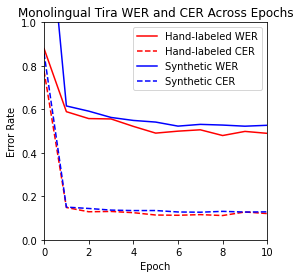

In [78]:
df_dict = {
    # 'Biling-in': (march_df, 'blue'),
    # 'Biling-out': (sep_df, 'green'),
    'Hand-labeled': (asr_df, 'red'),
    'Synthetic': (long_asr, 'blue'),
}

# Plotting
plt.figure(figsize=(4, 4))
for label, (df, color) in df_dict.items():
    # Plot WER with a solid line
    plt.plot(df['Epoch'], df['WER'], label=f'{label} WER', color=color, linestyle='-')
    # Plot CER with a dashed line
    plt.plot(df['Epoch'], df['CER'], label=f'{label} CER', color=color, linestyle='--')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.title('Monolingual Tira WER and CER Across Epochs')
plt.legend()
plt.ylim((0,1))
plt.xlim((0,10))

# Show plot
plt.show()

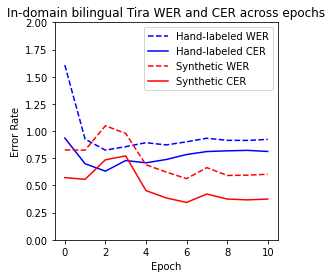

In [79]:
df_dict = {
    'Hand-labeled': (march_df, 'blue'),
    'Synthetic': (long_march, 'red'),
    # 'ASR': (asr_df, 'red')
}

# Plotting
plt.figure(figsize=(4, 4))
for label, (df, color) in df_dict.items():
    # Plot WER with a solid line
    plt.plot(df['Epoch'], df['WER'], label=f'{label} WER', color=color, linestyle='--')
    # Plot CER with a dashed line
    plt.plot(df['Epoch'], df['CER'], label=f'{label} CER', color=color, linestyle='-')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.title('In-domain bilingual Tira WER and CER across epochs')
plt.legend()
plt.ylim((0,2))

# Show plot
plt.show()

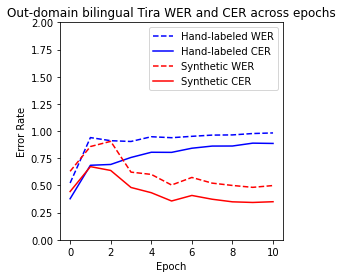

In [77]:
df_dict = {
    'Hand-labeled': (sep_df, 'blue'),
    'Synthetic': (long_sep, 'red'),
    # 'ASR': (asr_df, 'red')
}

# Plotting
plt.figure(figsize=(4, 4))
for label, (df, color) in df_dict.items():
    # Plot WER with a solid line
    plt.plot(df['Epoch'], df['WER'], label=f'{label} WER', color=color, linestyle='--')
    # Plot CER with a dashed line
    plt.plot(df['Epoch'], df['CER'], label=f'{label} CER', color=color, linestyle='-')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.title('Out-domain bilingual Tira WER and CER across epochs')
plt.legend()
plt.ylim((0,2))

# Show plot
plt.show()

In [32]:
mar_csvs=glob('../../data/biling_eval/elan_outputs/HH20210312/*.csv')
sep_csvs=glob('../../data/biling_eval/elan_outputs/HH20210913/*.csv')
mar_csvs=[x for x in mar_csvs if 'checkpoints-eval' not in x]
sep_csvs=[x for x in sep_csvs if 'checkpoints-eval' not in x]
mar_csvs, sep_csvs

(['../../data/biling_eval/elan_outputs/HH20210312/checkpoint-12288.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-2048.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-14336.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-6144.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/whisper-0.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-20480.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-8192.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-18432.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-16384.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-4096.csv',
  '../../data/biling_eval/elan_outputs/HH20210312/checkpoint-10240.csv'],
 ['../../data/biling_eval/elan_outputs/HH20210913/checkpoint-12288.csv',
  '../../data/biling_eval/elan_outputs/HH20210913/checkpoint-2048.csv',
  '../../data/biling_eval/elan_outputs/HH20210913/checkpoint-1

In [83]:
mar_csvs_long=glob('../../data/hf-datasets/tira-longlabels/HH20210312-eval/*.csv')
sep_csvs_long=glob('../../data/hf-datasets/tira-longlabels/HH20210913-eval/*.csv')
mar_csvs_long=[x for x in mar_csvs_long if 'checkpoints-eval' not in x]
sep_csvs_long=[x for x in sep_csvs_long if 'checkpoints-eval' not in x]
mar_csvs_long, sep_csvs_long

(['../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-10240HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-12288HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-20480HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-2048HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-18432HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-8192HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-14336HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-16384HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-6144HH20210312.csv',
  '../../data/hf-datasets/tira-longlabels/HH20210312-eval/checkpoint-4096HH20210312.csv'],
 ['../../data/hf-datasets/tira-longlabels/HH20210913-eval/checkpoint-4096HH20210913.csv',
  '

In [84]:
march_preds={}
march_preds['labels']=pd.read_csv(mar_csvs[0])['labels']
march_preds

{'labels': 0     Hello hello hello? Oh, this is a very big volu...
 1     Oh! I'm still sharing here. Ok, yep, I'm now r...
 2     Now I just have to, alright, so now I'm re-rec...
 3     lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀lɛ...
 4     lə̀və̀lɛ̀ðɔ́lóŋó únɛ́rɛ̀ Ok. And the next o...
                             ...                        
 83    So when it was "he will pull them" Mhm? láŋə́...
 84    You're talking about the sheep, which is, you ...
 85    Your human distinction. Okay. Which one do you...
 86    That one is... We, not you. Will pull them, re...
 87    jə̀və̀lɛ̀ðɔ́lə́ŋó ùnɛ̀ɾɛ̀ jə̀və̀lɛ̀ðɔ́lə́ŋò...
 Name: labels, Length: 88, dtype: object}

In [34]:
sep_preds={}
sep_preds['labels']=pd.read_csv(sep_csvs[0])['labels']
sep_preds

{'labels': 0     Or you have another few things you wanted to u...
 1     Himidan, are you ready with the recording? Yea...
 2     I checked the level and it seems okay so far. ...
 3     SR That's weird. There we go. Okay. MS So, Him...
 4     I saw in the Stephen dictionary it was written...
                             ...                        
 60    So it was written in the dictionary just as ɔ́...
 61    Or, or, or, uh, cause ɔ́ɾɔ́ could be, curse, I...
 62    Exactly yeah it's someone like "ɔ́ɾɔ́" is like...
 63    Hold on, I have closed O's for this one. For, ...
 64       Yeah, âɾò, well that is âɾò, âɾò, right?
 Name: labels, Length: 65, dtype: object}

In [87]:
for csv in mar_csvs:
    checkpoint_num=get_chkpnt_num(csv.removesuffix('.csv'))
    csv_df=pd.read_csv(csv)
    march_preds[f'{checkpoint_num}']=csv_df['preds']
for csv in sep_csvs:
    checkpoint_num=get_chkpnt_num(csv.removesuffix('.csv'))
    csv_df=pd.read_csv(csv)
    sep_preds[f'{checkpoint_num}']=csv_df['preds']
march_preds, sep_preds

({'labels': 0     Hello hello hello? Oh, this is a very big volu...
  1     Oh! I'm still sharing here. Ok, yep, I'm now r...
  2     Now I just have to, alright, so now I'm re-rec...
  3     lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀lɛ...
  4     lə̀və̀lɛ̀ðɔ́lóŋó únɛ́rɛ̀ Ok. And the next o...
                              ...                        
  83    So when it was "he will pull them" Mhm? láŋə́...
  84    You're talking about the sheep, which is, you ...
  85    Your human distinction. Okay. Which one do you...
  86    That one is... We, not you. Will pull them, re...
  87    jə̀və̀lɛ̀ðɔ́lə́ŋó ùnɛ̀ɾɛ̀ jə̀və̀lɛ̀ðɔ́lə́ŋò...
  Name: labels, Length: 88, dtype: object,
  '6': 0      hello hello hello oh this is a very big vaugh...
  1      I'm still sharing here. I'm not a recording t...
  2     àń óɾàŋcàtɛ́ óɾàŋcátɛ́ óɾàŋcátɛ́ ó...
  3                     lə̀və̀lɛ̀ðɔ́lŋô lɛ̀və̀lɛ̀ðɔ́lŋô
  4     làvə̀lɛ̀ðɔ́lə́ŋó ùnɛ́ɾɛ̀ làŋlvə́lɛ̂ðɛ̀ ùn...
              

In [36]:
march_preds_df=pd.DataFrame(march_preds)
march_preds_df=march_preds_df.sort_index(axis=1, key=lambda a: [0 if c=='labels' else int(c) for c in a])
march_preds_df.head()

,labels,0,1,2,3,4,5,6,7,8,9,10
0,"Hello hello hello? Oh, this is a very big volu...","Hello, hello, hello. Oh, this is a very big v...",hello hello hello oh this is a very big value ...,"Hello, hello, hello. Oh, this is a very big v...",hello hello hello oh this is a very big yeah ...,hello hello hello oh this is a very big value...,"Hello, hello, hello. Oh, this is a very big v...",hello hello hello oh this is a very big vaugh...,hello óh̀ hɛ̀lǒ òù this is a very big vǎl...,hello hello hello oh this is a very big válɛ...,álɔ́ álɛ́ kɔ́ɾì kɔ́ɛ́nɛ̀ álɛ́ kɔ́ɾì,helló hellóhelló oh this is a very big vál...
1,"Oh! I'm still sharing here. Ok, yep, I'm now r...","Oh, I'm still sharing here, okay. Okay, yeah,...",oh i'm still sharing here okay okay yeah i'm n...,oh i'm still sharing here ok ok yeah i'm not ...,oh ɔ̀mì s̀t̪í ɛ̀ɾɛ̀ ɛ̀ɔ̀gɛ̀ ɔ̀mɔ̀ ɛ̀ ɛ̀ ɛ̀ ɛ...,oh i'm still sharing here ok i'm not recordin...,oh i'm still sharing here okay okay yeah i'm ...,I'm still sharing here. I'm not a recording t...,ôú ìmìst̪íɲì ànŋì ìpɛ̀ ìŋìŋì ìnɔ̀ɾɛ̀,ò ìmìstɛ́ ɛ́ɾɛ̀ŋí ápɾó ídɔ̀,âó àmɛ̀ stílcì àɾɛ̀ŋí àðɔ́ kompírò j...,ôú ìst̪ílò ɛ̀lɛ̀ŋì òkɛ́ ìjá nò ɛ̀ kɔ...
2,"Now I just have to, alright, so now I'm re-rec...",He pulled them towards. He pulled them toward...,he pulled them towards,àít̪ʊ̀t̪ɔ́ àɾàŋ sɔ̀ nó ám réj rə̀kɔ́rdi...,áí ̀t̪àt̪ɔ̀ àɾàǹ sònɔ́ ám ɛ́rɛ̀ rɛ̀kɔ̀...,ná ɛ́tɔ́tɔ́tɛ̀ òlàŋì òlàŋì òlàŋì òl...,án ámɾ̀jɛ́r áràt sónɛ́ óɾàt ávə́lɛ̀m t...,àń óɾàŋcàtɛ́ óɾàŋcátɛ́ óɾàŋcátɛ́ ó...,nàìcàtɔ̀ ɛ̀ŋì rə̀kɔ̀ɾìŋ̀ àɾɛ̀ sò hèpɔ́...,á ɲátə́ árɛ̀ só hépɔ́l dɛ́n áwɾis̀ hépɔ...,àn áŋcátɔ́tɔ́ nɔ́ ámɾí kɔ́rdɛ́n álɛ́ kí...,náŋcàtɔ́tɔ̀ àn só náŋrí rɛ́cɔ̀rèn árè...
3,lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀lɛ...,"And can you add unere after it? Yes, levele d...",lə̀və̀lɛ̀ðɔ́lə́ŋò lə̀və̀lɛ̀ðɔ́lə́ŋò lə̀və̀lɛ...,lə̀və̀lɛ̀ðɔ́lə̀ŋô lə̀və̀lɛ̀ðɔ́lóŋò lə̀və̀l...,lə̀və̀lɛ̀ðɔ́lə̂ŋô lə̀və̀lɛ̀ðɔ́lə̂ŋô lə̀və̀lɛ...,lə̀və̀lɛ̀ðɔ́lŋù lə̀və̀lɛ̀ðɔ́lŋù lə̀və̀lɛ̀ðɔ́...,lə̀və̀lɛ̀ðɔ́lólə̀və̀lɛ̀ðɔ́lólɛ́və̀lɛ̀ðɔ́ló,lə̀və̀lɛ̀ðɔ́lŋô lɛ̀və̀lɛ̀ðɔ́lŋô,lə̀və̀lɛ̀ðɔ́lŋô,lə̀və̀lɛ̀ðɔ́lóŋò làvə̀lɛ̀ðɔ́ló,lə̀və̀lɛ̀ðɔ́lóŋò làvə̀lɛ̀ðɔ́lóŋò,lə̀və̀lɛ̀ðɔ́lóŋò làvə̀lɛ̀ðɔ́lóŋò làvə̀lɛ...
4,lə̀və̀lɛ̀ðɔ́lóŋó únɛ́rɛ̀ Ok. And the next o...,la vile dhalangu unnare. And the next one wou...,làvə̀lɛ̀ðɔ́lŋó únɛ̀ɾɛ̀ làvə̀lɛ̀ðɛ̀ ùnɛ̀ɾɛ̀,lə̀və̀lɛ̀ðɔ́lóŋó únɛ̄ɾɛ̀ làŋə̄lvə́lɛ̂ðɛ̀ u...,làvə̀lɛ̀ðɔ́lə́ŋó ùnɛ̀ɾɛ̀ làvə̀lɛ̀ðɛ̀ ùnɛ̀ɾɛ̀,làvə̀lɛ̀ðɔ́lɔ́ŋʊ ùnɛ́ɾɛ̀ làŋə̀lvə́lɛ̂ðɛ̀ ù...,lə̀və̀lɛ̀ðɔ́ló únɛ̀ɾɛ̀ làŋə̀l və́lɛ̂ðɛ̀ ùn...,làvə̀lɛ̀ðɔ́lə́ŋó ùnɛ́ɾɛ̀ làŋlvə́lɛ̂ðɛ̀ ùn...,làvə̀lɛ̀ðɔ́lə́ŋó únɛ̀ɾɛ̀ làŋə̀l və́lɛ̂ðɛ̀ ...,lə̀və̀lɛ̀ðɔ́lóŋó únɛ̀ɾɛ̀,làvə̀lɛ̀ðɔ́lóŋó únɛ̀ɾɛ̀,làvə̀lɛ̀ðɔ́lóŋó únɛ̀rɛ̀


In [37]:
sep_preds_df=pd.DataFrame(sep_preds)
sep_preds_df=sep_preds_df.sort_index(axis=1, key=lambda a: [-1 if c=='labels' else int(c) for c in a])
sep_preds_df.head()

,labels,0,1,2,3,4,5,6,7,8,9,10
0,Or you have another few things you wanted to u...,Or you have another few things you wanted to ...,Or you have another few things you wanted to ...,Or you have another few things you wanted to ...,Or you have another few things you wanted to ...,or you have another few things you wanted to ...,Or you have another few things you want to up...,We're you up another few things You're trying...,Or you have another few things You want to be...,or you have another few things you wanted to u...,You're trying to come in again,Or you have another a few things you want to ...
1,"Himidan, are you ready with the recording? Yea...","Not yet. Good. Thank you for asking. Himida, ...","Not yet? Good, thank you for asking. Gimmi, a...","Not yet? Good, thank you for asking. Gini, ar...","Not yet? Good, thank you for asking. You know...","not yet? good, thank you for asking. you know...","Not yet. Thank you for asking. Yeah, I'm read...","Yeah, I'm recording already. I've started sin...","not yet? good, thank you for asking. you need ...","Not yet. Thank you for asking. You need a, ar...",Not yet? Thank you for asking. You need a ná...,not yet good thank you for asking you know ho...
2,I checked the level and it seems okay so far. ...,I checked the level and it seems okay so far....,dɔ̀ɽ àcɛ̀ kə̀dɛ̀ lɛ̀vɔ̀làn it's okay so far ...,I don't know if you want to share your screen...,àcɛ̀ kə̀dɛ̀lɛ̀ɔ̀ àǹ ít̪ímìs̀ òpɔ̀,àcɛ̀ kə̀dɛ̀lɛ́ óɽà nɛ̀,àcɔ̀r àvɛ́ ndɔ̀ŋ àspár òsó àɾà ndɔ̀bà,àcɛ̀r àlɛ́vɛ́lɛ́vɛ̀rɛ̀,àcɔ̀ kə̀dɛ̀ lɛ̀ àn símə̀sɔ̀ kə̀ sɔ́pà,dàr àcàr kə̀dɛ̀ lɛ́wɔ́lànì símísà ok,àcɔ́r,àcə̀r lɛ́ òr àn símís òké àré òké
3,"SR That's weird. There we go. Okay. MS So, Him...","The word for? Oh, a squirrel?",the word for a squirrel,the word for oh it's kudl,the word for oh is kudl,the word for the squirrel,"it's mé it's ménɛ̀ň fɛ́lɛ̀ fɛ́sbɛ́n ní, yo...",the word for the squirrel,ìt̪ə̀mìjɛ̌ ɛ̀vɛ̀ ìnɛ̀ ìmìnɔ̀ fɛ̀r ìvə̀r ...,àt̪í úrɔ̀,líŋí ɛ̀nɛ̀ sɛ̀lɛ̀wɛ̀ lɛ̀vɛ̀ sɛ̀lɛ̀wɛ̀,déwɛ́n fɛ́gɛ́
4,I saw in the Stephen dictionary it was written...,I saw in the Steven dictionary it was written...,"ŋɔ̀ɽòn, jà ìs̀ ìǹ st̪ìjə̀ǹ dìkʃə̀nɛ̀ i...",ŋɔ̀ɽɔ̀n ìcə̀lò kànɔ̀laɾgðɔ̀gɛ̀r,úrɔ̀nɛ̀ ùðɛ̀ŋì ɛ̀cə̀lò ùnɛ̀làfɛ̀gɛ̀,ŋɔ̀ɽòn,ŋɔ̀ɽònɛ̀ àɾt̪ɛ̀ ŋìcɔ́lɔ̀ àt̪í kílò àmi...,ŋôɽònìjà ŋìcə̀rò àmínà ŋìcɔ́lò ŋìc...,nɔ̀ɽɔ̀nɛ̀ jâsɔ́ ɜ́ǹ lìksə̀ŋì ŋìcɔ́lɔ̀,ŋôɽò ndígɛ́ ámínà ŋìcɔ́lò àt̪ígí ki...,ŋɔ̀ɽònɛ̀ jàsə̀ ávə́ nínɛ̀ nìcɔ́lò àvtú...,àn ɔ́ɽɔ̀ŋ jâs áŋás ànŋí nàŋícɔ́lò àn...


In [88]:
march_preds_long={}
march_preds_long['labels']=pd.read_csv(mar_csvs_long[0])['labels']

sep_preds_long={}
sep_preds_long['labels']=pd.read_csv(sep_csvs[0])['labels']

for csv in mar_csvs_long:
    checkpoint_num=get_chkpnt_num(csv.removesuffix('HH20210312.csv'))
    csv_df=pd.read_csv(csv)
    march_preds_long[f'{checkpoint_num}']=csv_df['preds']
for csv in sep_csvs_long:
    checkpoint_num=get_chkpnt_num(csv.removesuffix('HH20210913.csv'))
    csv_df=pd.read_csv(csv)
    sep_preds_long[f'{checkpoint_num}']=csv_df['preds']

march_preds_long_df=pd.DataFrame(march_preds_long)
march_preds_long_df=march_preds_long_df.sort_index(axis=1, key=lambda a: [0 if c=='labels' else int(c) for c in a])

sep_preds_long_df=pd.DataFrame(sep_preds_long)
sep_preds_long_df=sep_preds_long_df.sort_index(axis=1, key=lambda a: [0 if c=='labels' else int(c) for c in a])

In [92]:
march_preds_df['num_words']=march_preds_df['labels'].str.split().apply(len)
sep_preds_df['num_words']=sep_preds_df['labels'].str.split().apply(len)

march_preds_long_df['num_words']=march_preds_long_df['labels'].str.split().apply(len)
sep_preds_long_df['num_words']=sep_preds_long_df['labels'].str.split().apply(len)

march_preds_df['num_words']

0     57
1     21
2     54
3     14
4     22
      ..
83    59
84    74
85    65
86    28
87     9
Name: num_words, Length: 88, dtype: int64

In [93]:
is_en_word = lambda w: unidecode.unidecode(w)==w
num_en_word=lambda s:len([x for x in s.split() if is_en_word(x)])

In [94]:
march_preds_df['num_english']=march_preds_df['labels'].apply(num_en_word)
sep_preds_df['num_english']=sep_preds_df['labels'].apply(num_en_word)

march_preds_long_df['num_english']=march_preds_long_df['labels'].apply(num_en_word)
sep_preds_long_df['num_english']=sep_preds_long_df['labels'].apply(num_en_word)

march_preds_df['num_english']

0     57
1     21
2     52
3      7
4     15
      ..
83    49
84    61
85    64
86    12
87     0
Name: num_english, Length: 88, dtype: int64

In [95]:
march_preds_df['Percent Tira']=1-march_preds_df['num_english']/march_preds_df['num_words']
sep_preds_df['Percent Tira']=1-sep_preds_df['num_english']/sep_preds_df['num_words']

march_preds_long_df['Percent Tira']=1-march_preds_long_df['num_english']/march_preds_long_df['num_words']
sep_preds_long_df['Percent Tira']=1-sep_preds_long_df['num_english']/sep_preds_long_df['num_words']

march_preds_df['Percent Tira'].mean(), sep_preds_df['Percent Tira'].mean()

(0.3041872973748202, 0.09823061453273639)

In [97]:
for i in tqdm(range(11)):
    epoch_col=str(i)
    colwer=march_preds_df.apply(lambda r: wer(r['labels'], r[epoch_col]), axis=1)
    colcer=march_preds_df.apply(lambda r: cer(r['labels'], r[epoch_col]), axis=1)
    march_preds_df['wer'+epoch_col]=colwer
    march_preds_df['cer'+epoch_col]=colcer

100%|██████████| 11/11 [00:00<00:00, 11.11it/s]


In [ ]:
for i in tqdm(range(11)):
    epoch_col=str(i)
    colwer=march_preds_long_df.apply(lambda r: wer(r['labels'], r[epoch_col]), axis=1)
    colcer=march_preds_long_df.apply(lambda r: cer(r['labels'], r[epoch_col]), axis=1)
    march_preds_long_df['wer'+epoch_col]=colwer
    march_preds_long_df['cer'+epoch_col]=colcer

100%|██████████| 10/10 [00:01<00:00,  9.02it/s]


In [43]:
for i in tqdm(range(11)):
    epoch_col=str(i)
    colwer=sep_preds_df.apply(lambda r: wer(r['labels'], r[epoch_col]), axis=1)
    colcer=sep_preds_df.apply(lambda r: cer(r['labels'], r[epoch_col]), axis=1)
    sep_preds_df['wer'+epoch_col]=colwer
    sep_preds_df['cer'+epoch_col]=colcer

100%|██████████| 11/11 [00:00<00:00, 26.21it/s]


In [100]:
for i in tqdm(range(11)):
    epoch_col=str(i)
    colwer=sep_preds_long_df.apply(lambda r: wer(r['labels'], r[epoch_col]), axis=1)
    colcer=sep_preds_long_df.apply(lambda r: cer(r['labels'], r[epoch_col]), axis=1)
    sep_preds_long_df['wer'+epoch_col]=colwer
    sep_preds_long_df['cer'+epoch_col]=colcer

100%|██████████| 10/10 [00:00<00:00, 12.19it/s]


In [44]:
sep_preds_df[['Percent Tira']+['wer'+str(i) for i in range(11)]].corr()

,Percent Tira,wer0,wer1,wer2,wer3,wer4,wer5,wer6,wer7,wer8,wer9,wer10
Percent Tira,1.000000,0.207927,0.252076,0.199884,0.297092,0.161293,0.260374,0.198963,0.188913,0.117558,0.095392,0.120102
wer0,0.207927,1.000000,0.035085,0.128728,0.051343,-0.015939,0.099961,0.052140,0.037234,0.101133,0.051109,0.041548
wer1,0.252076,0.035085,1.000000,0.143640,0.158985,0.029322,0.230594,0.005502,0.131398,-0.095370,0.070604,0.061390
wer2,0.199884,0.128728,0.143640,1.000000,0.262189,0.110883,0.219684,0.265967,0.239563,0.244623,0.110850,0.156062
wer3,0.297092,0.051343,0.158985,0.262189,1.000000,0.123944,0.248509,0.603301,0.296861,0.159657,0.140908,0.209788
wer4,0.161293,-0.015939,0.029322,0.110883,0.123944,1.000000,0.119258,0.182247,0.201175,0.114958,0.163518,0.290260
wer5,0.260374,0.099961,0.230594,0.219684,0.248509,0.119258,1.000000,0.194523,0.308947,0.157220,-0.182360,0.077391
wer6,0.198963,0.052140,0.005502,0.265967,0.603301,0.182247,0.194523,1.000000,0.353840,0.157256,-0.029371,0.347205
wer7,0.188913,0.037234,0.131398,0.239563,0.296861,0.201175,0.308947,0.353840,1.000000,0.096562,-0.302391,0.208542
wer8,0.117558,0.101133,-0.095370,0.244623,0.159657,0.114958,0.157220,0.157256,0.096562,1.000000,0.496164,0.237526


In [45]:
sep_preds_df[['Percent Tira']+['cer'+str(i) for i in range(11)]].corr()

,Percent Tira,cer0,cer1,cer2,cer3,cer4,cer5,cer6,cer7,cer8,cer9,cer10
Percent Tira,1.000000,0.228523,0.426577,0.224523,0.332833,0.186463,0.276205,0.156061,0.000126,-0.014515,-0.113310,0.059139
cer0,0.228523,1.000000,0.204412,0.109790,0.157056,0.048775,0.155859,0.121605,0.060425,0.096662,-0.024112,0.062070
cer1,0.426577,0.204412,1.000000,0.204850,0.306043,0.127295,0.458210,0.068637,0.163168,0.016025,0.070330,0.245196
cer2,0.224523,0.109790,0.204850,1.000000,0.446592,0.295042,0.385332,0.308313,0.322162,0.230067,0.111734,0.339153
cer3,0.332833,0.157056,0.306043,0.446592,1.000000,0.294761,0.467058,0.512006,0.470293,0.262134,0.249197,0.454932
cer4,0.186463,0.048775,0.127295,0.295042,0.294761,1.000000,0.283416,0.243163,0.314456,0.143906,0.306302,0.344167
cer5,0.276205,0.155859,0.458210,0.385332,0.467058,0.283416,1.000000,0.376855,0.473519,0.288605,0.118898,0.316945
cer6,0.156061,0.121605,0.068637,0.308313,0.512006,0.243163,0.376855,1.000000,0.604489,0.379521,0.273100,0.411830
cer7,0.000126,0.060425,0.163168,0.322162,0.470293,0.314456,0.473519,0.604489,1.000000,0.429186,0.176304,0.302797
cer8,-0.014515,0.096662,0.016025,0.230067,0.262134,0.143906,0.288605,0.379521,0.429186,1.000000,0.359959,0.332085


In [46]:
march_preds_df[['Percent Tira']+['wer'+str(i) for i in range(11)]].corr()

,Percent Tira,wer0,wer1,wer2,wer3,wer4,wer5,wer6,wer7,wer8,wer9,wer10
Percent Tira,1.000000,0.158428,-0.075933,-0.176754,-0.114596,-0.248972,-0.223019,-0.278070,-0.531832,-0.447840,-0.373048,-0.517923
wer0,0.158428,1.000000,-0.035717,-0.020744,0.048327,0.085286,-0.039771,-0.026461,-0.064703,-0.129819,-0.055185,-0.066577
wer1,-0.075933,-0.035717,1.000000,0.720534,0.087112,0.067149,0.255592,0.101383,0.097931,0.173800,0.148537,0.086159
wer2,-0.176754,-0.020744,0.720534,1.000000,0.442894,0.294419,0.540359,0.370243,0.386689,0.412735,0.428978,0.417651
wer3,-0.114596,0.048327,0.087112,0.442894,1.000000,0.351764,0.819108,0.688012,0.616736,0.556510,0.685669,0.688231
wer4,-0.248972,0.085286,0.067149,0.294419,0.351764,1.000000,0.480666,0.480603,0.427964,0.416621,0.438569,0.537025
wer5,-0.223019,-0.039771,0.255592,0.540359,0.819108,0.480666,1.000000,0.725690,0.653996,0.589930,0.699466,0.776931
wer6,-0.278070,-0.026461,0.101383,0.370243,0.688012,0.480603,0.725690,1.000000,0.703678,0.599426,0.612338,0.740902
wer7,-0.531832,-0.064703,0.097931,0.386689,0.616736,0.427964,0.653996,0.703678,1.000000,0.762040,0.676374,0.783846
wer8,-0.447840,-0.129819,0.173800,0.412735,0.556510,0.416621,0.589930,0.599426,0.762040,1.000000,0.742860,0.717044


In [47]:
march_preds_df[['Percent Tira']+['cer'+str(i) for i in range(11)]].corr()

,Percent Tira,cer0,cer1,cer2,cer3,cer4,cer5,cer6,cer7,cer8,cer9,cer10
Percent Tira,1.000000,0.096641,-0.108672,-0.098415,-0.021994,-0.380942,-0.258848,-0.252678,-0.468272,-0.397614,-0.356308,-0.514726
cer0,0.096641,1.000000,-0.024353,0.119206,0.126500,0.120177,0.005141,0.025246,0.052497,-0.063239,0.043992,0.051760
cer1,-0.108672,-0.024353,1.000000,0.438750,0.085370,0.159676,0.232193,-0.000015,-0.106049,0.150956,0.202301,0.163539
cer2,-0.098415,0.119206,0.438750,1.000000,0.546058,0.573943,0.644991,0.475689,0.273863,0.394048,0.508296,0.457839
cer3,-0.021994,0.126500,0.085370,0.546058,1.000000,0.547282,0.667186,0.562859,0.466582,0.436720,0.557283,0.483953
cer4,-0.380942,0.120177,0.159676,0.573943,0.547282,1.000000,0.700431,0.671346,0.465884,0.538090,0.607107,0.656786
cer5,-0.258848,0.005141,0.232193,0.644991,0.667186,0.700431,1.000000,0.680629,0.594785,0.599104,0.688654,0.700634
cer6,-0.252678,0.025246,-0.000015,0.475689,0.562859,0.671346,0.680629,1.000000,0.654314,0.533555,0.614933,0.690237
cer7,-0.468272,0.052497,-0.106049,0.273863,0.466582,0.465884,0.594785,0.654314,1.000000,0.646202,0.619659,0.675226
cer8,-0.397614,-0.063239,0.150956,0.394048,0.436720,0.538090,0.599104,0.533555,0.646202,1.000000,0.708574,0.650869


In [51]:
march_preds_df.to_csv('../../data/biling_eval/elan_outputs/HH20210312_preds.csv')
sep_preds_df.to_csv('../../data/biling_eval/elan_outputs/HH20210913_preds.csv')

In [101]:
march_preds_df['Percent English']=1-march_preds_df['Percent Tira']
sep_preds_df['Percent English']=1-sep_preds_df['Percent Tira']

march_preds_long_df['Percent English']=1-march_preds_long_df['Percent Tira']
sep_preds_long_df['Percent English']=1-sep_preds_long_df['Percent Tira']

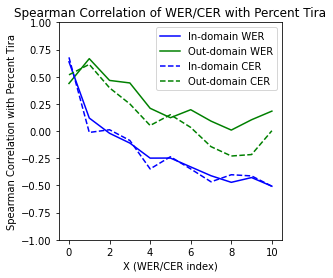

In [105]:
correlation_data = {
    'wer': {'march_preds_df': [], 'sep_preds_df': []},
    'cer': {'march_preds_df': [], 'sep_preds_df': []}
}

# Iterate over wer and cer columns
for i in range(11):
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for march_preds_df
    correlation_data['wer']['march_preds_df'].append(march_preds_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['march_preds_df'].append(march_preds_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])
    
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for sep_preds_df
    correlation_data['wer']['sep_preds_df'].append(sep_preds_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['sep_preds_df'].append(sep_preds_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])

# Plotting
plt.figure(figsize=(4,4))
x_values = list(range(11))

# Plot wer correlations
plt.plot(x_values, correlation_data['wer']['march_preds_df'], label='In-domain WER', linestyle='-', color='blue')
plt.plot(x_values, correlation_data['wer']['sep_preds_df'], label='Out-domain WER', linestyle='-', color='green')

# Plot cer correlations
plt.plot(x_values, correlation_data['cer']['march_preds_df'], label='In-domain CER', linestyle='--', color='blue')
plt.plot(x_values, correlation_data['cer']['sep_preds_df'], label='Out-domain CER', linestyle='--', color='green')

# Adding labels and title
plt.xlabel('X (WER/CER index)')
plt.ylabel('Spearman Correlation with Percent Tira')
plt.title('Spearman Correlation of WER/CER with Percent Tira')
plt.legend()
plt.ylim((-1,1))

# Show plot
plt.show()

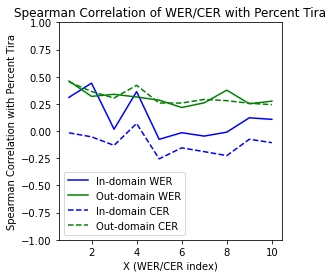

In [106]:
correlation_data = {
    'wer': {'march_preds_long_df': [], 'sep_preds_long_df': []},
    'cer': {'march_preds_long_df': [], 'sep_preds_long_df': []}
}

# Iterate over wer and cer columns
for i in range(1,11):
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for march_preds_long_df
    correlation_data['wer']['march_preds_long_df'].append(march_preds_long_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['march_preds_long_df'].append(march_preds_long_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])
    
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for sep_preds_long_df
    correlation_data['wer']['sep_preds_long_df'].append(sep_preds_long_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['sep_preds_long_df'].append(sep_preds_long_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])

# Plotting
plt.figure(figsize=(4,4))
x_values = list(range(1,11))

# Plot wer correlations
plt.plot(x_values, correlation_data['wer']['march_preds_long_df'], label='In-domain WER', linestyle='-', color='blue')
plt.plot(x_values, correlation_data['wer']['sep_preds_long_df'], label='Out-domain WER', linestyle='-', color='green')

# Plot cer correlations
plt.plot(x_values, correlation_data['cer']['march_preds_long_df'], label='In-domain CER', linestyle='--', color='blue')
plt.plot(x_values, correlation_data['cer']['sep_preds_long_df'], label='Out-domain CER', linestyle='--', color='green')

# Adding labels and title
plt.xlabel('X (WER/CER index)')
plt.ylabel('Spearman Correlation with Percent Tira')
plt.title('Spearman Correlation of WER/CER with Percent Tira')
plt.ylim((-1,1))
plt.legend()

# Show plot
plt.show()